In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


In [3]:
import os
import numpy as np

In [7]:
train_data_dir  = "C:/Users/HP/Downloads/tomato/New Plant Diseases Dataset(Augmented)/train"

In [8]:
validation_data_dir = "C:/Users/HP/Downloads/tomato/New Plant Diseases Dataset(Augmented)/valid"

In [20]:
img_width, img_height = 224, 224
batch_size = 32
epochs = 6 
num_classes = len(os.listdir(train_data_dir))

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    validation_split=0.2
)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify subset as training
)


Found 14678 images belonging to 10 classes.


In [23]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation
)


Found 915 images belonging to 10 classes.


In [24]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))



In [25]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)  # Increased number of units
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)  # Additional dense layer
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


In [26]:
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
for layer in model.layers[-10:]:  # Unfreeze more layers
    layer.trainable = True



In [28]:
def lr_schedule(epoch):
    if epoch < 10:
        return 0.0001
    elif epoch < 20:
        return 0.00001
    else:
        return 0.000001

In [29]:
model.compile(optimizer=Adam(lr=lr_schedule(0)), loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[LearningRateScheduler(lr_schedule)]
)


Epoch 1/6
458/458 [==============================] - 6218s 14s/step - loss: 2.0120 - accuracy: 0.2500 - val_loss: 1.5158 - val_accuracy: 0.4632 - lr: 1.0000e-04
Epoch 2/6
458/458 [==============================] - 6989s 15s/step - loss: 1.2565 - accuracy: 0.5527 - val_loss: 0.8686 - val_accuracy: 0.6975 - lr: 1.0000e-04
Epoch 3/6
458/458 [==============================] - 6735s 15s/step - loss: 0.7177 - accuracy: 0.7541 - val_loss: 0.5168 - val_accuracy: 0.8214 - lr: 1.0000e-04
Epoch 4/6
458/458 [==============================] - 6216s 14s/step - loss: 0.4502 - accuracy: 0.8499 - val_loss: 0.2938 - val_accuracy: 0.8940 - lr: 1.0000e-04
Epoch 5/6
458/458 [==============================] - 6662s 15s/step - loss: 0.3416 - accuracy: 0.8894 - val_loss: 0.2966 - val_accuracy: 0.9051 - lr: 1.0000e-04
Epoch 6/6
458/458 [==============================] - 6225s 14s/step - loss: 0.2425 - accuracy: 0.9238 - val_loss: 0.1537 - val_accuracy: 0.9464 - lr: 1.0000e-04


In [31]:
validation_score_fine_tuned = model.evaluate(validation_generator, verbose=0)
print('Fine-tuned Validation loss:', validation_score_fine_tuned[0])
print('Fine-tuned Validation accuracy:', validation_score_fine_tuned[1])


Fine-tuned Validation loss: 0.15074804425239563
Fine-tuned Validation accuracy: 0.9530054926872253


In [44]:
predictions = model.predict_generator(validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_10016\3587654317.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


In [45]:
predicted_classes = predictions.argmax(axis=1)

In [47]:
predicted_classes

array([8, 5, 8, 9, 9, 5, 1, 0, 2, 0, 1, 6, 7, 1, 0, 4, 8, 4, 8, 7, 3, 7,
       3, 1, 1, 5, 7, 0, 7, 7, 2, 9, 6, 3, 5, 4, 5, 8, 4, 3, 4, 9, 5, 0,
       1, 2, 1, 9, 2, 7, 6, 8, 0, 3, 9, 4, 4, 8, 0, 2, 0, 9, 4, 4, 1, 2,
       0, 9, 0, 3, 6, 8, 5, 2, 3, 2, 1, 6, 2, 9, 4, 4, 5, 7, 5, 8, 3, 2,
       3, 0, 2, 6, 7, 8, 9, 2, 8, 2, 1, 7, 1, 8, 3, 9, 2, 8, 9, 6, 1, 5,
       1, 3, 8, 5, 6, 3, 1, 9, 0, 6, 6, 4, 3, 1, 3, 2, 7, 2, 9, 1, 2, 9,
       1, 3, 4, 0, 8, 0, 5, 8, 7, 0, 1, 3, 9, 7, 1, 9, 6, 5, 0, 7, 7, 5,
       4, 3, 5, 0, 3, 4, 0, 9, 6, 3, 5, 6, 7, 3, 1, 2, 6, 1, 1, 0, 7, 0,
       1, 3, 4, 1, 0, 9, 4, 1, 4, 8, 7, 6, 9, 8, 5, 0, 7, 9, 0, 6, 3, 6,
       0, 2, 3, 8, 2, 6, 5, 3, 1, 9, 5, 6, 0, 0, 6, 1, 9, 2, 7, 8, 5, 3,
       0, 8, 9, 0, 5, 0, 2, 8, 3, 7, 9, 1, 4, 0, 5, 5, 0, 5, 3, 9, 0, 1,
       3, 0, 8, 0, 8, 2, 8, 2, 4, 4, 1, 1, 6, 1, 4, 7, 3, 2, 5, 7, 8, 2,
       7, 6, 5, 9, 7, 9, 6, 5, 9, 0, 8, 3, 2, 2, 5, 1, 6, 7, 7, 0, 3, 1,
       8, 4, 6, 6, 4, 6, 5, 0, 4, 9, 8, 0, 4, 2, 7,

In [52]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
validation_filenames = validation_generator.filenames
validation_filepaths = [os.path.join(validation_data_dir, filename) for filename in validation_filenames]

In [55]:
num_images_to_display = 8
random_indices = np.random.choice(len(validation_filepaths), num_images_to_display, replace=False)


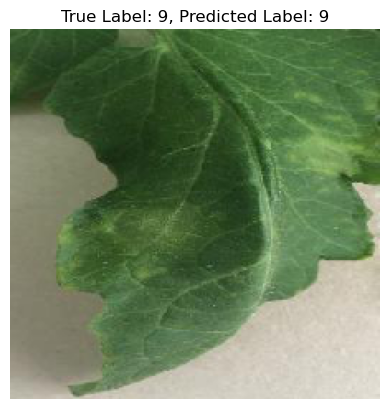

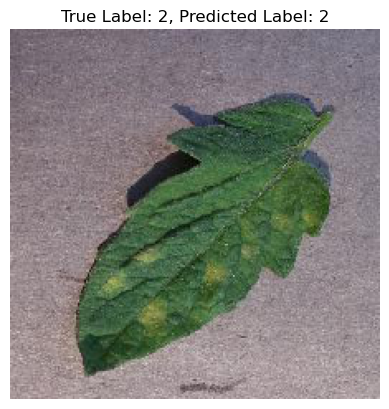

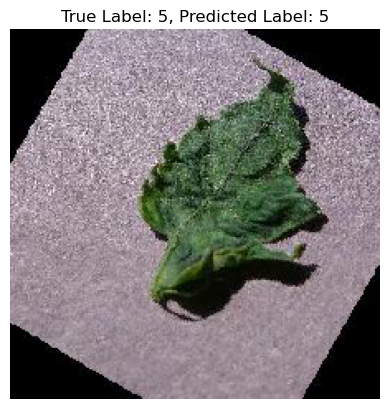

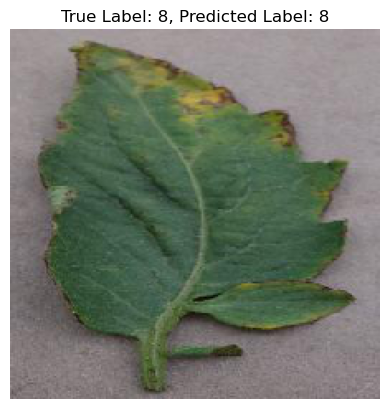

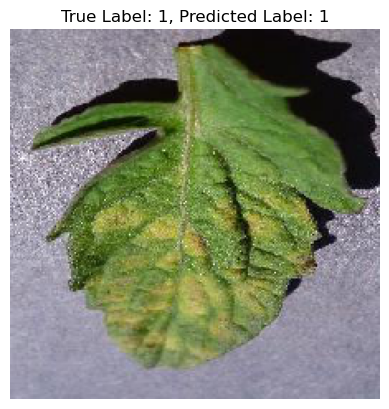

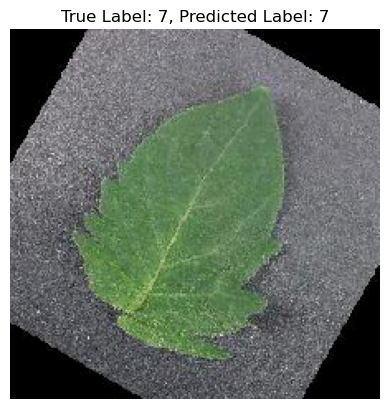

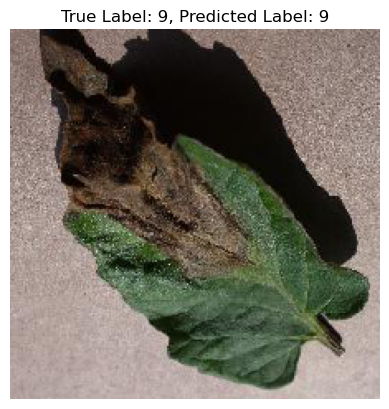

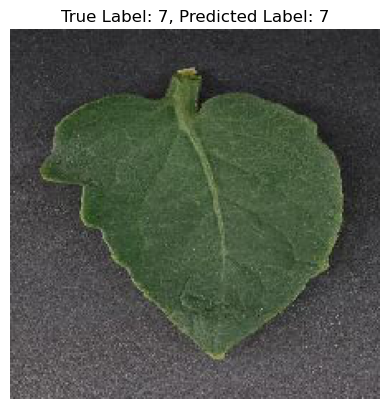

In [56]:
for index in random_indices:
    img_path = validation_filepaths[index]
    true_label = predicted_classes[index]
    predicted_label = predicted_classes[index]

    # Load and display the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size based on your model's input size
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.show()